Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')
[' Allergy / Immunology' ' Bariatrics' ' Cardiovascular / Pulmonary'
 ' Neurology' ' Dentistry' ' Urology' ' General Medicine' ' Surgery'
 ' Speech - Language' ' SOAP / Chart / Progress Notes' ' Sleep Medicine'
 ' Rheumatology' ' Radiology' ' Psychiatry / Psychology' ' Podiatry'
 ' Physical Medicine - Rehab' ' Pediatrics - Neonatal' ' Pain Management'
 ' Orthopedic' ' Ophthalmology' ' Office Notes' ' Obstetrics / Gynecology'
 ' Neurosurgery' ' Nephrology' ' Letters' ' Lab Medicine - Pathology'
 ' IME-QME-Work Comp etc.' ' Hospice - Palliative Care'
 ' Hematology - Oncology' ' Gastroenterology' ' ENT - Otolaryngology'
 ' Endocrinology' ' Emergency Room Reports' ' Discharge Summary'
 ' Diets and Nutritions' ' Dermatology' ' Cosmetic / Plastic Surgery'
 ' Consult - History and Phy.' ' Chiropractic' ' Autopsy']
medical_specialty
Surgery                         

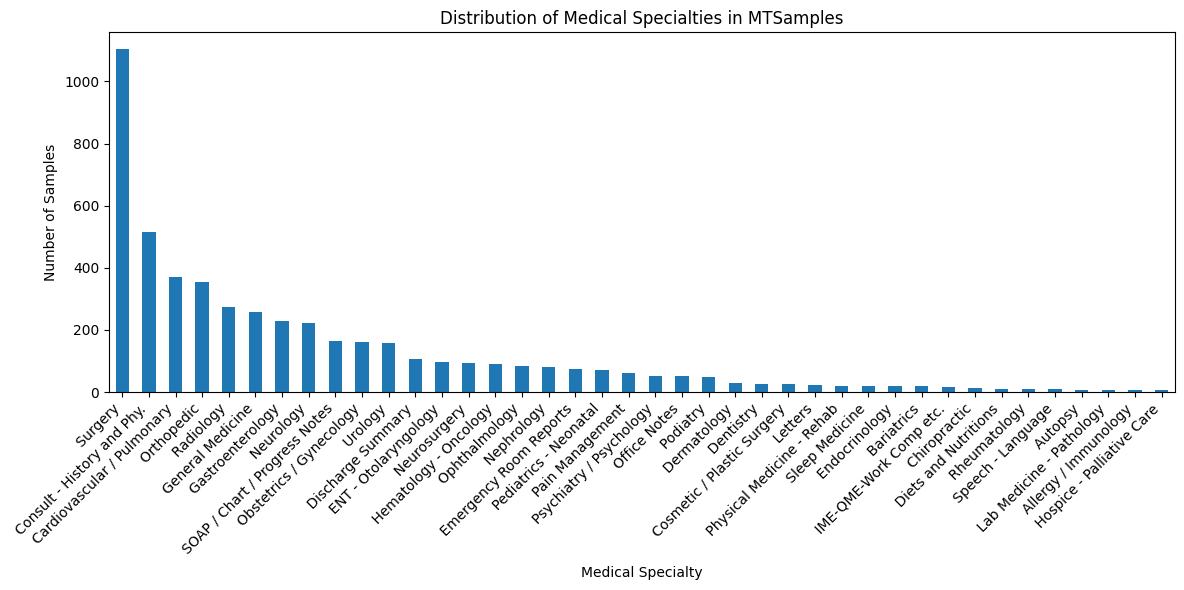

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('mtsamples.csv')

# Check the column names
print(df.columns)

# Count the occurrences of each medical specialty
specialty_counts = df['medical_specialty'].value_counts()

print(df['medical_specialty'].unique())

# Display the counts
print(specialty_counts)

# Plot the distribution as a bar chart
plt.figure(figsize=(12, 6))
specialty_counts.plot(kind='bar')
plt.xlabel('Medical Specialty')
plt.ylabel('Number of Samples')
plt.title('Distribution of Medical Specialties in MTSamples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Total number of samples in internal medicine specialties: 1088
medical_specialty
Cardiovascular / Pulmonary    372
General Medicine              259
Gastroenterology              230
Hematology - Oncology          90
Nephrology                     81
Sleep Medicine                 20
Endocrinology                  19
Rheumatology                   10
Allergy / Immunology            7
Name: count, dtype: int64


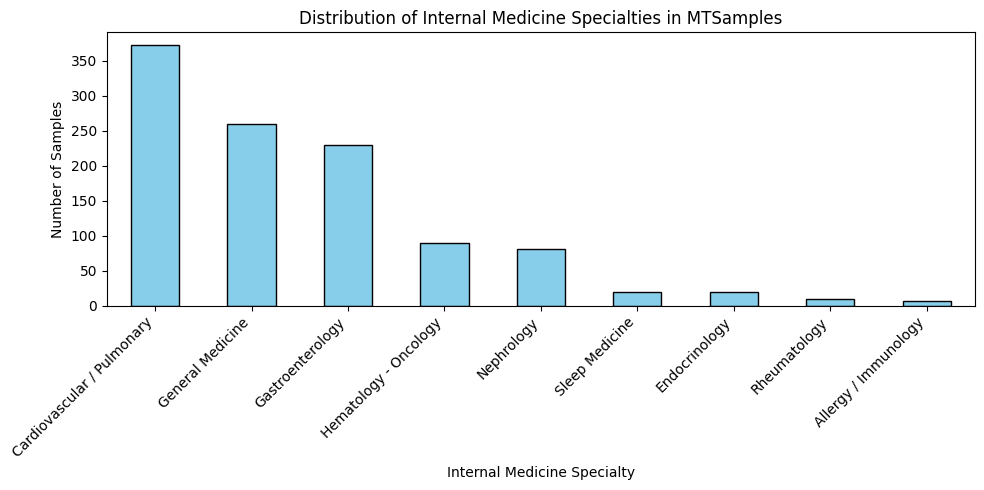

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# List of internal medicine specialties
internal_medicine_specialties = [
    'Allergy / Immunology',
    'Cardiovascular / Pulmonary',
    'General Medicine',
    'Sleep Medicine',
    'Rheumatology',
    'Nephrology',
    'Hematology - Oncology',
    'Gastroenterology',
    'Endocrinology'
]

# Load the data
df = pd.read_csv('mtsamples.csv')

# Remove leading/trailing whitespace
df['medical_specialty'] = df['medical_specialty'].str.strip()

# Filter for internal medicine specialties
internal_df = df[df['medical_specialty'].isin(internal_medicine_specialties)]

# Count and display the total number of samples
print("Total number of samples in internal medicine specialties:", len(internal_df))

# Count the occurrences of each specialty
internal_specialty_counts = internal_df['medical_specialty'].value_counts()

# Display the counts
print(internal_specialty_counts)

# Plot
plt.figure(figsize=(10, 5))
internal_specialty_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Internal Medicine Specialty')
plt.ylabel('Number of Samples')
plt.title('Distribution of Internal Medicine Specialties in MTSamples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# List of internal medicine specialties
internal_medicine_specialties = [
    'Allergy / Immunology',
    'Cardiovascular / Pulmonary',
    'General Medicine',
    'Sleep Medicine',
    'Rheumatology',
    'Nephrology',
    'Hematology - Oncology',
    'Gastroenterology',
    'Endocrinology'
]

# Load the data
df = pd.read_csv('mtsamples.csv')

# If the first column has no name, rename it to 'row_id'
# if df.columns[0] == '':
df.rename(columns={df.columns[0]: 'row_id'}, inplace=True)

# Remove leading/trailing whitespace in ALL string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Filter for internal medicine specialties
internal_df = df[df['medical_specialty'].isin(internal_medicine_specialties)]

# Save to a new CSV file
internal_df.to_csv('mtsamples_internal_medicine_cleaned.csv', index=False)

print("Filtered, cleaned, and saved as 'mtsamples_internal_medicine_cleaned.csv'")


Filtered, cleaned, and saved as 'mtsamples_internal_medicine_cleaned.csv'


In [18]:
import difflib

def find_similar_specialties(specialty_list, text, cutoff=0.8):
    text_lower = text.lower()
    found = []
    
    for specialty in specialty_list:
        specialty_lower = specialty.lower()
        
        # Exact match first
        if specialty_lower in text_lower:
            found.append(specialty)
            continue

        # Approximate match: compare specialty against text chunks (sliding window)
        text_words = text_lower.split()
        spec_words = specialty_lower.split()
        window_size = len(spec_words)

        # Sliding window over the text
        for i in range(len(text_words) - window_size + 1):
            text_chunk = ' '.join(text_words[i:i+window_size])
            similarity = difflib.SequenceMatcher(None, specialty_lower, text_chunk).ratio()
            if similarity >= cutoff:
                found.append(specialty)
                break

    if not found:
        return None
    return list(set(found))

# Example usage
specialty_list = [
    'Allergy / Immunology',
    'Cardiovascular / Pulmonary',
    'General Medicine',
    'Sleep Medicine',
    'Rheumatology',
    'Nephrology',
    'Hematology - Oncology',
    'Gastroenterology',
    'Endocrinology'
]

text = "Allergy / Immunology"
print(find_similar_specialties(specialty_list, text))


['Allergy / Immunology']
